# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import os
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

Question: Basic Summary of the Data Set.

The code for this step is contained in the second code cell of the IPython notebook.

I used the pandas library to calculate summary statistics of the traffic signs data set:

The size of training set is ?
The size of test set is ?
The shape of a traffic sign image is ?
The number of unique classes/labels in the data set is ?


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Shape of X_train (34799, 32, 32, 3)
Shape of y_train (34799,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Question: The code for this step is contained in the third code cell of the IPython notebook below.

Here is an exploratory visualization of the data set. It is a bar chart showing number of Inputs per class and
followed by Data visualization by rendering images from data file using matplotlib.pyplot

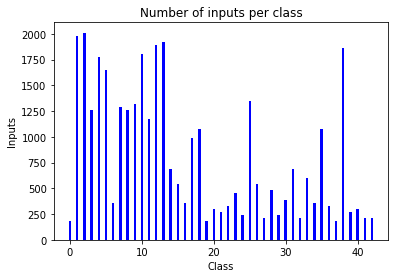

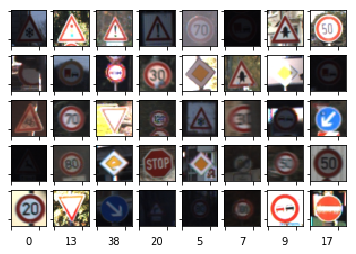

Data visualisation complete


In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

inputs_per_class = np.bincount(train_labels)
max_inputs = np.max(inputs_per_class)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()

fig = plt.figure(figsize=(32,32))

fig, axes = plt.subplots(nrows=5, ncols=8)

for i, ax in enumerate(axes.flat, start=1):
    idx = random.randint(0, len(X_train))
    img = X_train[idx].squeeze()
    ax.imshow(img)
    #print(y_train[idx], '=', sign_names[class_ids.index(str(y_train[idx]))])
    ax.set_xlabel(y_train[idx])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

#fig.tight_layout()

plt.show()
print('Data visualisation complete')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)
Question : Describe how you preprocessed the data. Why did you choose that technique?

Answer: Preprocessing of input data is an important step to improve the efficiency & accuracy of the model. 
Common techniques adopted are Converting to gray scale (to handle statistical invariants & reduce not very useful features in datasets), Mean subtraction to center the cloud of feature data around the origin in every dimension, Normalizing the image data by diving each dimension by its standard deviation to ensure that the features to have similar range that our gradients will remain under control.

Following Image Preprocessing are done in this model (along with its reasons): 1) Mean Subtraction - to center the cloud of feature data around the origin in every dimension 2) Normalization - to ensure that the features to have similar range that our gradients will remain under control 3) Converting to Gray Scale - to reduce the pixels (featues) that doesn't help classifying a traffic sign

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

def preprocess(X_data):
    index = random.randint(0, len(X_data))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

    #Mean Subtraction
    #X -= np.mean(X, axis = 0)
    X_data -= (np.mean(X_data, axis=0)).astype(X_data.dtype)
    #X_test -= (np.mean(X_test, axis=0)).astype(X_train.dtype)

    #index = random.randint(0, len(X_train))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

    #Normalization
    #X /= np.std(X, axis = 0)
    X_data = X_data / np.std(X_data, axis=0)
    #X_test = X_test / np.std(X_test, axis=0)

    #index = random.randint(0, len(X_train))
    image = X_data[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    
    return X_data

In [7]:
def toGray(images):
    print(images.shape)
    imgs = np.mean(images, axis=3)
    print(imgs.shape)
    return np.expand_dims(imgs, axis=3)

#X_train = toGray(X_train)
#print(X_train.shape)

Shape of X_train (34799, 32, 32, 3)
Shape of X_test (12630, 32, 32, 3)
Shape of y_train (34799,)
Shape of y_test (12630,)
iteration 1
iteration 101
iteration 201
iteration 301
iteration 401
iteration 501
iteration 601
iteration 701
iteration 801
iteration 901
After generating additional images
Shape of X_train (35799, 32, 32, 3)
Shape of X_test (12630, 32, 32, 3)
Shape of y_train (35799,)
Shape of y_test (12630,)


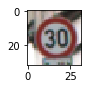

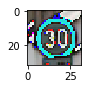

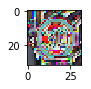

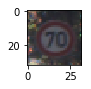

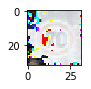

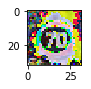

In [8]:
### Generate data additional data (OPTIONAL!)
### Feel free to use as many code cells as needed.
import cv2

def generateImg(img):
    
    rot_range = np.random.randint(10, high=50)
    shear_range = np.random.randint(1, high=10)
    trans_range = np.random.randint(1, high=5)
    gray = np.random.randint(0, high=100)%2
    
    rot_angle = np.random.normal(rot_range)-rot_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_angle,1)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))

    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    img = cv2.warpAffine(img,Trans_M,(cols,rows))

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    #if gray == 1:
    #    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

qty = 1000 #np.ceil(len(X_train)/10)
for i in range(qty):
    if i%100==0:
        print('iteration', i+1)
    new_img = X_train[i].copy()
    new_img = generateImg(new_img)
    X_train = np.append(X_train, new_img[None, :], axis=0)
    y_train = np.append(y_train, y_train[i])
    
print("After generating additional images")
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

#X_test = toGray(X_test)
#X_train = toGray(X_train)

X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [11]:
### and split the data into training/validation/testing sets here.

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

n_train = len(X_train)
n_validation = len(X_validation)
n_test = len(X_test)

### Model Architecture : Question

Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

Answer: Training, Validation & Testing Data: For training a neural network model, we need datasets for training, validating and finally testing the model.
▸ We were provided with training and testing datasets.
▸ From the training data set provided, a small subset (30%) is randomly picked and kept aside as validation set. The data is split using sklearn's train_test_split function.

Generated Additional Data: 

Additional set of traffic sign images are generated from existing training set data. The original image data are mostly well defined and properly oriented images, but in real world, the traffic sign images could have been dis-oriented due to various reasons. Hence an additional set of images got created by rotating, transforming and sheer transforming a small set (upto 30%) of original images. 

Used OpenCV Geometrical transformation function warpAffine to generate new transformed images.

Also, if the distribution of different types of samples are not uniformly distributed in the given training set, the model would be trained biased towards the samples that are present in higher number. By generating additional samples, this type of bias could be reduced. If needed, the histogram of the samples could be analysed and samples that are very less in the samples could be generated to even out the sample distribution.

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

n_classes = 43
mu = 0
sigma = 0.1

layer_depth = {
    'layer_1': 6,
    'layer_2': 16,
    'layer_3_fc': 400,
    'layer_4_fc': 120,
    'layer_5_fc': 84
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal([5, 5, 3, layer_depth['layer_1']], mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal([5, 5, layer_depth['layer_1'], layer_depth['layer_2']], mean = mu, stddev = sigma)),
    'layer_3_fc': tf.Variable(tf.truncated_normal([layer_depth['layer_3_fc'], layer_depth['layer_4_fc']], mean = mu, stddev = sigma)),
    'layer_4_fc': tf.Variable(tf.truncated_normal([layer_depth['layer_4_fc'], layer_depth['layer_5_fc']], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([layer_depth['layer_5_fc'], n_classes], mean = mu, stddev = sigma))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'layer_3_fc': tf.Variable(tf.zeros(layer_depth['layer_3_fc'])),
    'layer_4_fc': tf.Variable(tf.zeros(layer_depth['layer_4_fc'])),
    'layer_5_fc': tf.Variable(tf.zeros(layer_depth['layer_5_fc'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def myCnn(x):    

    # Layer 1: Convolutional. Input = 32x32x3 (32x32x1 if converted to gray). Output = 28x28x6.
    print('x.shape = ', x.get_shape())
    conv1 = tf.nn.conv2d(x, weights['layer_1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['layer_1'])

    # Activation.
    conv1 = tf.nn.tanh(conv1)
    print('conv1.shape = ', conv1.get_shape())

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv1.pool.shape = ', conv1.get_shape())

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['layer_2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['layer_2'])
    
    # Activation.
    conv2 = tf.nn.tanh(conv2)
    print('conv2.shape = ', conv2.get_shape())

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv2.pool.shape = ', conv2.get_shape())

    # Flatten. Input = 5x5x16. Output = 400.
    conv2 = flatten(conv2)
    print('conv2.flatten.shape = ', conv2.get_shape())
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    conv3_fc = tf.add(tf.matmul(conv2, weights['layer_3_fc']), biases['layer_4_fc'])
    print('conv3_fc.shape = ', conv3_fc.get_shape())
    
    # Activation.
    conv3_fc = tf.nn.tanh(conv3_fc)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    conv4_fc = tf.add(tf.matmul(conv3_fc, weights['layer_4_fc']), biases['layer_5_fc'])
    print('conv4_fc.shape = ', conv4_fc.get_shape())
    
    # Activation.
    conv4_fc = tf.nn.relu(conv4_fc)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    out = tf.add(tf.matmul(conv4_fc, weights['out']), biases['out'])
    print('out.shape = ', out.get_shape())
    
    return out #logits as output

Question 

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 
For reference on how to build a deep neural network using  TensorFlow, see Deep Neural Network in TensorFlow 
from the classroom.
Answer:
The final architecture of this model is,
Input => Images of size 32x32 with 3 color channels are sent to first layer
Layer-1 (Convolution, Activation, Max Pooling) => Convoluted to 28x28x6, then to 14x14x6 through Pooling with 
tanh activation in between
Layer-2 (Convolution, Activation, Max Pooling) => Convoluted to 10x10x16, then to 5x5x16 through Pooling with 
tanh activation in between
Layer-3 (Flatten, Fully Connected, Activation) => Flattened to 400 features and sent to fully connected 
convultion with an output of 120 features, followed by tanh activation
Layer-4 (Fully Connected, Activation) => 120 features further sent to fully connected layer to get 84 features, 
followed by RELU activation
Layer-5 (Fully Connected) => 84 features are finally turned to 43 class of logits through a fully connected 
convolution
Logits => Softmax Probability => The logits are sent to Softmax cross entropy function of tf to measure 
the distance between the predicted and actual values (cross entropy)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.



In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

EPOCHS = 50
BATCH_SIZE = 128
l_rate = 0.001

logits = myCnn(x)
#print('logits', logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = l_rate)
training_operation = optimizer.minimize(loss_operation)

x.shape =  (?, 32, 32, 3)
conv1.shape =  (?, 28, 28, 6)
conv1.pool.shape =  (?, 14, 14, 6)
conv2.shape =  (?, 10, 10, 16)
conv2.pool.shape =  (?, 5, 5, 16)
conv2.flatten.shape =  (?, 400)
conv3_fc.shape =  (?, 120)
conv4_fc.shape =  (?, 84)
out.shape =  (?, 43)


In [14]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Question : How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

I trained the model by tweaking the following parameters: Batch Size = 128 Training batch size 
refers to the number of samples that are taken at a time to train a model in a single iteration. 
This size should be chosen depending on the Computer RAM size that we have. Epochs = 200 Epoch 
refers to a cycle of forward pass & backward pass of all training samples into a model. Number of 
epoch is the number of times that we presented the training data to the model to get trained. 
The number of epoch is adjusted until we reduce the cost (loss) to the lowest possible value. 
Learning Rate = 0.0001 Learning rate determines how fast the model should learn from the training dataset. 
Higher learning rates often provides lower accuracy, but learns faster. As we have a good computing capacity, 
it is better to have the lower learning rate. mu = 0, sigma = 0.1 These hyper parameters determines 
the initial values of weights & biases to be used to start training the model. These values should be properly distributed to have the model get trained smoothly without drastic changes in loss. Optimization = AdamOptimizer Optimization algorithms are used to reduce the loss function in neural networks. Stocastic Gradient Descent is the commonly used algorithm. AdamOptimizer is the variation of SGD and is popularly used optimizer nowadays. Activation = tanh / relu Tried different activation functions tanh and relu to ensure the better preduction accuracy.

Question : What approach did you take in coming up with a solution to this problem? It may have been a 
    process of trial and error, in which case, outline the steps you took to get to the final solution 
    and why you chose those steps. Perhaps your solution involved an already well known implementation 
    or architecture. In this case, discuss why you think this is suitable for the current problem.
Answer:
    I undestnd that it is an iterative process of tweaking each every parameters & options available to arrive at 
    the highest accuracy of prediction with a reasonable time to train in a given computer with limited processing 
    memory & GPU cores.
1) As per guidance of  LeNet architecture to this model, Modified the parameters of the model for this given 
dataset, and ran it as it is with no modification. 
2) As a next step, recalled all tweaking options for dataset preprocessing, generating additional dataset, 
spliting the data for validation, choosing the model architecture, size of the filter, size of batch, number 
of epochs, learning rate, activation algorithms and optimization algorithms. Refered several articles & videos 
available online to know better on them.
3) Applied one by one change to the model and recorded the accuracy that could achieve for each. After trying 
for several rounds, recognized that few changes improved the accuracy and few didn't and few reduced the accuracy. 
Why did I chose those tweaking steps? 

Some of the steps were able to compare logically to the given problem and the approach that we are taking towards 
the solution, for example: a) Converting the image to gray scale: Often the traffic signs are recognized based on 
visual patterns rather than the color of the signs. Hence reducing to gray scale will reduce the dataset 
size & help computing faster & efficient. b) Mean Substraction & Normalization: Positioning the feature 
data to center and ensuring the gradients to remain within a range. c) Tweaking the hyper parameters: 
To balance the speed of training & increasing the accuracy. d) Adding more layers, Max/Avg Pooling, changing the optimizer, and many more.

Unfortunately, I couldn't try all the options (although I made attempts using keras - My laptop processor 
could not handle it (my gpu space is not increased by aws and I am following it up) and tried few items and 
reverted back due to very low accuracy, but tried several options and will continue trying it.
Why I think this is suitable for current problem? LeNet is one of the successful CNN model for visual 
recognition. It was proved on MNIST dataset consisting of numbers. Our problem data set also consists of 
traffic signs which contains numerals and similar visual patterns. Hence this LeNet architecture would be 
very appropriate for the current problem.


In [15]:
#Train the Model

#Train the Model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1), "Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print()
        
    print('Predicting Test Dataset')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, 'lenet_german_traffic_sign_2')
    print("Model saved")

Training...

EPOCH 1 ... Validation Accuracy = 0.316
EPOCH 2 ... Validation Accuracy = 0.508
EPOCH 3 ... Validation Accuracy = 0.636
EPOCH 4 ... Validation Accuracy = 0.742
EPOCH 5 ... Validation Accuracy = 0.787
EPOCH 6 ... Validation Accuracy = 0.822
EPOCH 7 ... Validation Accuracy = 0.835
EPOCH 8 ... Validation Accuracy = 0.860
EPOCH 9 ... Validation Accuracy = 0.863
EPOCH 10 ... Validation Accuracy = 0.870
EPOCH 11 ... Validation Accuracy = 0.872
EPOCH 12 ... Validation Accuracy = 0.877
EPOCH 13 ... Validation Accuracy = 0.878
EPOCH 14 ... Validation Accuracy = 0.879
EPOCH 15 ... Validation Accuracy = 0.878
EPOCH 16 ... Validation Accuracy = 0.883
EPOCH 17 ... Validation Accuracy = 0.880
EPOCH 18 ... Validation Accuracy = 0.881
EPOCH 19 ... Validation Accuracy = 0.885
EPOCH 20 ... Validation Accuracy = 0.875
EPOCH 21 ... Validation Accuracy = 0.886
EPOCH 22 ... Validation Accuracy = 0.886
EPOCH 23 ... Validation Accuracy = 0.886
EPOCH 24 ... Validation Accuracy = 0.884
EPOCH 25 ...

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

Question 

Choose six candidate images of traffic signs and provide them in the report. Are there any 
particular qualities of the image(s) that might make classification difficult? It could be helpful 
to plot the images in the notebook.

Answer: Chose 6 images containing training signs from internet and tried to predit it using the trained model. Resized all the images manually to 32x32 pixels size and they are plotted as below.


### Load and Output the Images

X_new shape (6, 32, 32, 3)
3
Pict 1 Stop [ 14 ]
Pict 2 Go straight or right [ 36 ]
Pict 3 Road work [ 25 ]
Pict 4 Ahead only [ 35 ]
Pict 5 Speed limit (70km/h) [ 4 ]
Pict 6 Wild animals crossing [ 31 ]


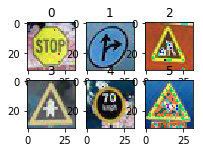

[14 36 25 35  4 31]


In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import csv
class_ids = []
sign_names = []
with open('signnames.csv', 'rt') as f:
    csvreader = csv.DictReader(f)
    for row in csvreader:
        class_ids.append(row['ClassId'])
        sign_names.append(row['SignName'])

#print(class_ids)
#print(y_train[idx], '=', sign_names[class_ids.index(str(y_train[idx]))])

# Defining additional images taken from internet
def newtestdata(gray=False):
    testdir = os.path.join(os.getcwd(), 'test')
    X_new = []
    for filename in os.listdir(testdir):
        fn = os.path.join(testdir, filename)
        #print(fn)
        if gray:
            img = cv2.imread(fn, 0)
        else:
            img = cv2.imread(fn)
        img = img.astype(np.float32)
        #print(img.shape)
        X_new.append(img)

    X_new = np.asarray(X_new)
    if gray:
        X_new = np.expand_dims(X_new, axis=3)
    
    print('X_new shape', X_new.shape)
    print(X_new[0].ndim)
    #print(testimgs.shape)
   
    y_new = np.array([14,36,25,35,4,31])

  
        
    plt.figure(1, (3,3))
    for i in range(len(X_new)):
        plt.subplot(3,3,i+1)
        plt.imshow(X_new[i].squeeze())
        plt.title(i)
        print('Pict', i+1, sign_names[class_ids.index(str(y_new[i]))], "[", y_new[i], "]")
        #plt.axis('off')
    
    #plt.tight_layout()
    plt.show()

    return X_new, y_new

X_new, y_new = newtestdata()
print(y_new)
        
  


QUESTION : Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.


ANSWER: 

Have chosen 6 images containing training signs from internet and tried to predit it using the trained model. Resized all the images manually to 32x32 pixels size and they are plotted above.

1) Chose STOP traffic sign: Chosen for its bright RED color

2) Chose an Straight-Right sign:  where there is no background. Also, it has the curve detection oportunity.

3) Chosen Road Work :  Traffic signs  with background should be easy to determine 

4) Chosen Priority Road ahead : sign which is just a diamond shape with a border. Should be straight forward to detect. 

5) Chosen 70Kmph Speed Limit sign : It is not having a standard big numbers of 70, instead it is having a smaller digits with the kmph unit and the digits are positioned in the upper half of the cirlce.

6) Chosen a Wild animal crossing traffic sign: showing a rabbit image. In general, the wild animal crossing traffic signs varies drastically depending on the habitats of that locality.





### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#X_new, y_new = newtestdata()
#print(y_new)

#X_new = toGray(X_new)
#X_new = preprocess(X_new)

ckptfn = 'lenet_german_traffic_sign_2'
modelfn = os.path.join(os.getcwd(), ckptfn)

with tf.Session() as sess:
    saver.restore(sess, modelfn)
    print('Model restored with latest weights and validation accuracy', validation_accuracy)
    x = tf.placeholder(tf.float32, [None, 32, 32, 3])
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)
    y_logits = myCnn(x)
    y_predictions = tf.nn.softmax(y_logits)
    y_predictions_vals = sess.run(y_predictions, feed_dict={x: X_new})
    top_5 = tf.nn.top_k(y_predictions, k=5)
    top_5_vals = sess.run(top_5, feed_dict={x: X_new})
    #print('top_5_vals', top_5_vals)
    
    print("Predicted values & actual values are")
    print(np.argmax(y_predictions_vals, 1))
    print(y_new)

    correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_new, y:y_new})
    print('Accuracy', accuracy)

Model restored with latest weights and validation accuracy 0.887371134144
x.shape =  (?, 32, 32, 3)
conv1.shape =  (?, 28, 28, 6)
conv1.pool.shape =  (?, 14, 14, 6)
conv2.shape =  (?, 10, 10, 16)
conv2.pool.shape =  (?, 5, 5, 16)
conv2.flatten.shape =  (?, 400)
conv3_fc.shape =  (?, 120)
conv4_fc.shape =  (?, 84)
out.shape =  (?, 43)
Predicted values & actual values are
[14 36 31 24 16  0]
[14 36 25 35  4 31]
Accuracy 0.333333


## Analyze Performance

Question : Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 6 signs correctly, it's less than 20% accurate.

NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

Answer: The trained model didn't do a good prediction on the 6 images chosen from internet. It predicted 2 traffic signs correctly out of 6, so the accuracy is 33%. 

Correct Predictions: 
    Pict 1 Stop [ 14 ]
    Pict 2 Go straight or right [ 36 ]

Incorrect Predictions: 

    Pict 3 Road work [ 25 ]
    Pict 4 Ahead only [ 35 ]
    Pict 5 Speed limit (70km/h) [ 4 ]
    Pict 6 Wild animals crossing [ 31 ]
    
Analysis : 

As compared to Test results of Trained Model, the performance of the Model upon new 6 images is not that good. While Trained Model showed around 66% accuracy, the captured images shown only 33% accuracy. 

Every EPOCH of testing also showed around 85  to 86% accuracy. This is probably the model is overfitting. Focus probably needs to be on the improving of pre-processing of the images. 



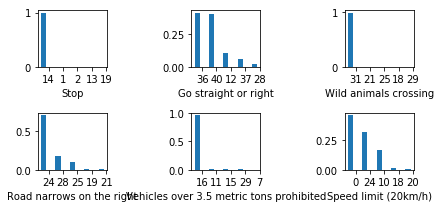

X_new shape (6, 32, 32, 3)
3
Pict 1 Stop [ 14 ]
Pict 2 Go straight or right [ 36 ]
Pict 3 Road work [ 25 ]
Pict 4 Ahead only [ 35 ]
Pict 5 Speed limit (70km/h) [ 4 ]
Pict 6 Wild animals crossing [ 31 ]


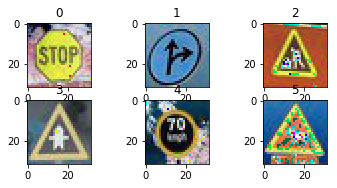

True values  [14 36 25 35  4 31]


In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

idxs = top_5_vals.indices
vals = top_5_vals.values

plt.figure()
width = .35
ind = np.arange(len(vals[0]))
plt.figure(1, (3,3))
for i in range(len(idxs)):
    plt.subplot(3,3,i+1)
    plt.xlabel(sign_names[class_ids.index(str(idxs[i, 0]))])
    plt.bar(ind, vals[i], width=width)
    plt.xticks(ind + width, idxs[i])

plt.tight_layout()
plt.show()

plt.figure()
_, y_new = newtestdata()
print('True values ', y_new)



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.


In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print(idxs)
print(vals)

[[14  1  2 13 19]
 [36 40 12 37 28]
 [31 21 25 18 29]
 [24 28 25 19 21]
 [16 11 15 29  7]
 [ 0 24 10 18 20]]
[[  9.99988437e-01   1.09018847e-05   4.91110256e-07   1.33734559e-07
    9.06977604e-09]
 [  4.08741802e-01   4.00002986e-01   1.01427056e-01   5.92907183e-02
    2.01616138e-02]
 [  9.96993899e-01   2.67099496e-03   1.98443100e-04   1.36493472e-04
    1.01222717e-07]
 [  7.05087543e-01   1.77775577e-01   9.66325104e-02   1.05522340e-02
    7.41785578e-03]
 [  9.52261627e-01   1.81376785e-02   1.43884048e-02   9.84295458e-03
    2.43691448e-03]
 [  4.61374015e-01   3.18930387e-01   1.66051641e-01   1.88195892e-02
    1.07730115e-02]]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


### **Answer:** 
Answer: The top 6 softmax probabilities are shown as bar graph along the values at the bottom of the output for reference. In my example pictures, the first predictions are appearing to be most certain in 3 cases even though 2 of them were incorrect while 1 is correct (PIC : STOP)

In rest of the 3 images, the second largest probability is having some percentage value that can be attributed to a label trying to be classified, but even in those cases, the second predictions happens to be incorrect for 2 of them while 1 (PIC : Go straight or right) falls under correct prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 